### **Assignemnt 1**

In [56]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import seaborn as sns
import matplotlib.pyplot as plt

<pre style="font-family: monospace;">
input (x)
│
├── Layer 1 (3 neurons: w00,b00 / w01,b01 / w02,b02)
│     ↓ Activation: ReLU
│
├── Layer 2 (2 neurons: w10,b10 / w11,b11)
│     ↓ Activation: Sigmoid
│
├── Combine the two outputs (+)
│     ↓ Activation: Tanh
│
└── Output layer (1 neuron: w20,b20)
      ↓ Activation: None (linear output)
</pre>

In [57]:
class Assignment_1_NN(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Layer 1
        self.w00, self.b00 = nn.Parameter(torch.tensor(0.5, requires_grad=True)), nn.Parameter(torch.tensor(0.1, requires_grad=True))
        self.w01, self.b01 = nn.Parameter(torch.tensor(0.8, requires_grad=True)), nn.Parameter(torch.tensor(-0.2, requires_grad=True))
        self.w02, self.b02 = nn.Parameter(torch.tensor(-0.3, requires_grad=True)), nn.Parameter(torch.tensor(0.05, requires_grad=True))

        # Layer 2 
        self.w10, self.b10 = nn.Parameter(torch.tensor(0.4, requires_grad=True)), nn.Parameter(torch.tensor(0.05, requires_grad=True))
        self.w11, self.b11 = nn.Parameter(torch.tensor(-0.6, requires_grad=True)), nn.Parameter(torch.tensor(0.1, requires_grad=True))

        # Output Layer
        self.w20, self.b20 = nn.Parameter(torch.tensor(0.4, requires_grad=True)), nn.Parameter(torch.tensor(0.05, requires_grad=True))

    def forward(self, input):
        # forward layer 1
        z1 = input * self.w00 + self.b00
        z2 = input * self.w01 + self.b01
        z3 = input * self.w02 + self.b02

        y1 = F.relu(z1)
        y2 = F.relu(z2)
        y3 = F.relu(z3)
        
        # forward layer 2
        Combined_layer_1 = y1 + y2 + y3
        z4 = Combined_layer_1 * self.w10 + self.b10
        z5 = Combined_layer_1 * self.w11 + self.b11

        y4 =  F.sigmoid(z4)
        y5 =  F.sigmoid(z5)

        Combined_layer_2 = y4 + y5
        pre_output = F.tanh(Combined_layer_2)
        
        # Output layer
        output = pre_output * self.w20 + self.b20
        return output

In [58]:
Assignment_1_model = Assignment_1_NN()
Assignment_1_model.w00

Parameter containing:
tensor(0.5000, requires_grad=True)

In [59]:
x_train = torch.linspace(1, 2.5, 40)

y_train = torch.tensor([
    1.5702, 1.5750, 1.5790, 1.5824, 1.5853, 1.5877, 1.5897, 1.5914, 1.5928,
    1.5939, 1.5949, 1.5958, 1.5965, 1.5970, 1.5975, 1.5979, 1.5983, 1.5985,
    1.5988, 1.5990, 1.5991, 1.5993, 1.5994, 1.5995, 1.5996, 1.5996, 1.5997,
    1.5998, 1.5998, 1.5998, 1.5999, 1.5999, 1.5999, 1.5999, 1.5999, 1.5999,
    1.6000, 1.6000, 1.6000, 1.6000
])

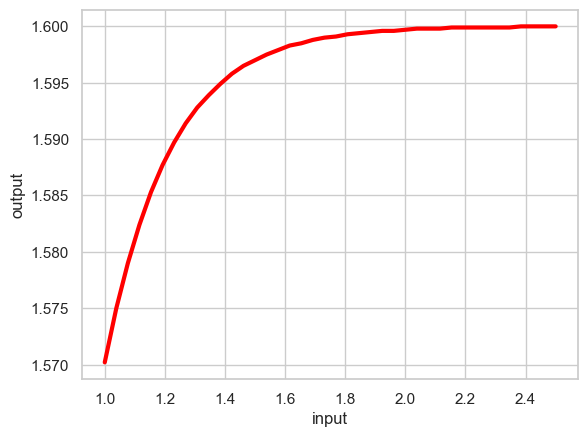

In [60]:
sns.set(style="whitegrid")

sns.lineplot(
    x=x_train,
    y=y_train,
    color='red',
    linewidth=3
)

plt.ylabel('output')
plt.xlabel('input')
plt.show()

In [61]:
pred_outputs = Assignment_1_model(x_train)
pred_outputs

tensor([0.3511, 0.3507, 0.3504, 0.3500, 0.3496, 0.3493, 0.3490, 0.3486, 0.3483,
        0.3480, 0.3477, 0.3474, 0.3471, 0.3468, 0.3465, 0.3462, 0.3460, 0.3457,
        0.3455, 0.3452, 0.3450, 0.3448, 0.3446, 0.3444, 0.3442, 0.3440, 0.3438,
        0.3437, 0.3435, 0.3434, 0.3432, 0.3431, 0.3430, 0.3429, 0.3428, 0.3427,
        0.3426, 0.3425, 0.3424, 0.3423], grad_fn=<AddBackward0>)

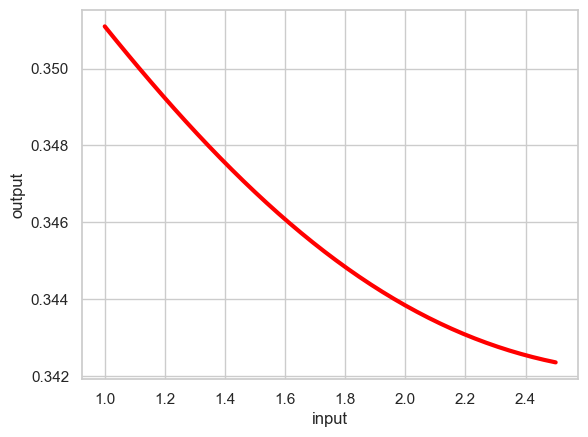

In [62]:
sns.set(style="whitegrid")

sns.lineplot(
    x=x_train,
    y=pred_outputs.detach(),
    color='red',
    linewidth=3
)

plt.ylabel('output')
plt.xlabel('input')
plt.show()

In [63]:
optimizer = SGD(Assignment_1_model.parameters(), lr=0.01)
loss = nn.MSELoss()

In [64]:
for epoch in range(500):
    total_loss = 0

    for i in range(len(x_train)):
        input_i = x_train[i]
        true_output_i = y_train[i]
        pred_output_i = Assignment_1_model(input_i)
        loss_value = loss(pred_output_i, true_output_i)
        loss_value.backward()
        total_loss += loss_value

    print("Epoch:", epoch, " | Total Loss:", total_loss)

    optimizer.step()
    optimizer.zero_grad()

Epoch: 0  | Total Loss: tensor(62.4761, grad_fn=<AddBackward0>)
Epoch: 1  | Total Loss: tensor(4.3913, grad_fn=<AddBackward0>)
Epoch: 2  | Total Loss: tensor(0.4832, grad_fn=<AddBackward0>)
Epoch: 3  | Total Loss: tensor(0.0498, grad_fn=<AddBackward0>)
Epoch: 4  | Total Loss: tensor(0.0098, grad_fn=<AddBackward0>)
Epoch: 5  | Total Loss: tensor(0.0059, grad_fn=<AddBackward0>)
Epoch: 6  | Total Loss: tensor(0.0055, grad_fn=<AddBackward0>)
Epoch: 7  | Total Loss: tensor(0.0055, grad_fn=<AddBackward0>)
Epoch: 8  | Total Loss: tensor(0.0055, grad_fn=<AddBackward0>)
Epoch: 9  | Total Loss: tensor(0.0055, grad_fn=<AddBackward0>)
Epoch: 10  | Total Loss: tensor(0.0055, grad_fn=<AddBackward0>)
Epoch: 11  | Total Loss: tensor(0.0054, grad_fn=<AddBackward0>)
Epoch: 12  | Total Loss: tensor(0.0054, grad_fn=<AddBackward0>)
Epoch: 13  | Total Loss: tensor(0.0054, grad_fn=<AddBackward0>)
Epoch: 14  | Total Loss: tensor(0.0054, grad_fn=<AddBackward0>)
Epoch: 15  | Total Loss: tensor(0.0054, grad_fn=<

In [65]:
pred_outputs = Assignment_1_model(x_train)
pred_outputs

tensor([1.5959, 1.5960, 1.5960, 1.5960, 1.5960, 1.5960, 1.5960, 1.5961, 1.5961,
        1.5960, 1.5960, 1.5960, 1.5960, 1.5960, 1.5959, 1.5959, 1.5959, 1.5958,
        1.5958, 1.5957, 1.5957, 1.5956, 1.5955, 1.5955, 1.5954, 1.5953, 1.5953,
        1.5952, 1.5951, 1.5950, 1.5949, 1.5948, 1.5947, 1.5946, 1.5945, 1.5944,
        1.5943, 1.5942, 1.5941, 1.5940], grad_fn=<AddBackward0>)